In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [28]:
D = 60.0; #um^2/s
alpha = 1.4*1e-4; #um^2/s
R = 5.0; #um
K = 32.51/0.033; #unitless
vol_fraction = 0.4; #unitless
L = 100; #um
cinit = 1.0; #mol/um^3

nspace = 21; #Division in space
nkernel = 10; #Number of kernel expansions
timestep = 0.25; #s
decay_limit = 0.1; #Limite of kernel decay
maxwindow = 1000;

dx = L/(nspace-1)

In [32]:
data_sphere = np.loadtxt("../data/result_large_convolution")
data_cylinder = np.loadtxt("../data/result_large_convolution_cylinder")
data_clean = np.loadtxt("../data/result_clean_test")

In [33]:
def make_time_space(res, timestep):
    t, c = res[:, 0], res[:, 1:]
    x = np.linspace(0, L, res.shape[1]-1);
    return t, x, c
t_sphere, x_sphere, c_sphere = make_time_space(data_sphere, timestep);
t_cylinder, x_cylinder, c_cylinder = make_time_space(data_cylinder, timestep);
t_clean, x_clean, c_clean = make_time_space(data_clean, timestep);

Text(0.5, 1.0, 'Flux at outlet')

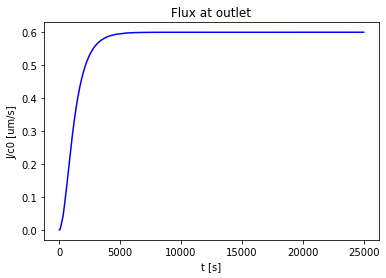

In [36]:
iscale = -1
plt.plot(t_sphere[:iscale], D*c_sphere[:iscale, -2]/dx, color='blue')
plt.ylabel("J/c0 [um/s]")
plt.xlabel("t [s]")
plt.title("Flux at outlet")
#plt.savefig("../tex/figs/flux")

In [43]:
%matplotlib qt
plt.plot(t_sphere[:iscale], D*c_sphere[:iscale, -2]/dx, 'b-', label='sph')
plt.plot(t_cylinder[:iscale], D*c_cylinder[:iscale, -2]/dx, 'g-', label='cyl')
plt.plot(t_clean[:iscale], D*c_clean[:iscale, -2]/dx, 'r-', label='no')
plt.legend()
plt.semilogx()
plt.ylabel("J/c0 [um/s]")
plt.xlabel("t [s]")
plt.title("Flux at outlet")
plt.savefig("../tex/figs/flux")

In [41]:
t_sphere[-1]

25000.0

In [42]:
for i in [499, 999, 1999, 4999]:
    plt.figure()
    plt.plot(x_sphere, c_sphere[i, :], color='blue', label='sph')
    plt.plot(x_cylinder, c_cylinder[i, :], color='green', label='cyl')
    plt.plot(x_clean, c_clean[i, :], color='red', label='no')
    plt.legend()
    plt.xlabel("x [um]")
    plt.ylabel("c/c0 [unitless]")
    plt.title("Concentration profile at t={0} s".format(t_sphere[i]))
    plt.savefig("../tex/figs/profile%i"%i)